## Introduction to the Sample Final Test

Dear Students,

Welcome to the sample final test for our laboratory course. This test is designed to assess your understanding and application of the concepts and techniques we have covered throughout the semester. 

Instructions:

Read Each Question Carefully: Ensure you understand what is being asked before you start coding.

Write Clean and Commented Code: Your code should be well-organized and include comments explaining your logic.

Test Your Code: Make sure to test your code with different inputs to ensure it works correctly.

Conclusions: Make final decisions, decide about the statistical and practical significance. 

Resources:

You are allowed to use your notes, textbooks, and online resources to help you complete the test. 

**Please be advised that the use of any Generative AI (GenAI) tools is strictly prohibited during this test. This includes, but is not limited to, tools that generate code, text, or any other form of content based on AI algorithms.**

Collaboration with classmates is not permitted. This test is an individual assessment of your skills.

I encourage you to take your time and approach each question methodically. This test is an opportunity to demonstrate your proficiency and understanding of the material. 

Best regards,

Karol
/Mathematical Statistics 2024/2025/



# Task 1: Verify the Hypothesis

Objective: Verify the hypothesis that the salaries of professors working in theoretical departments (B) are much lower than those working in applied departments (A).

     rownames      rank discipline  yrs.since.phd  yrs.service   sex  salary
0           1      Prof          B             19           18  Male  139750
1           2      Prof          B             20           16  Male  173200
2           3  AsstProf          B              4            3  Male   79750
3           4      Prof          B             45           39  Male  115000
4           5      Prof          B             40           41  Male  141500
..        ...       ...        ...            ...          ...   ...     ...
392       393      Prof          A             33           30  Male  103106
393       394      Prof          A             31           19  Male  150564
394       395      Prof          A             42           25  Male  101738
395       396      Prof          A             25           15  Male   95329
396       397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]
TtestResult(statistic=-3.513732636743348, pvalue=0.0

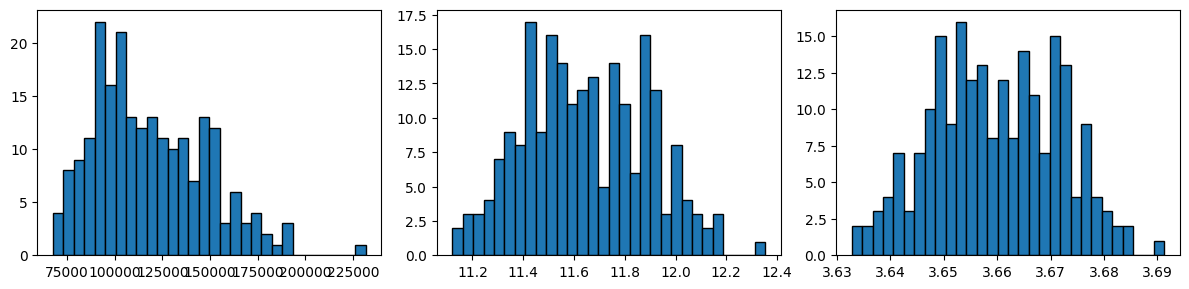

ShapiroResult(statistic=0.981501311833227, pvalue=0.01677562195045212)
ShapiroResult(statistic=0.9850858810631471, pvalue=0.05130286095942916)


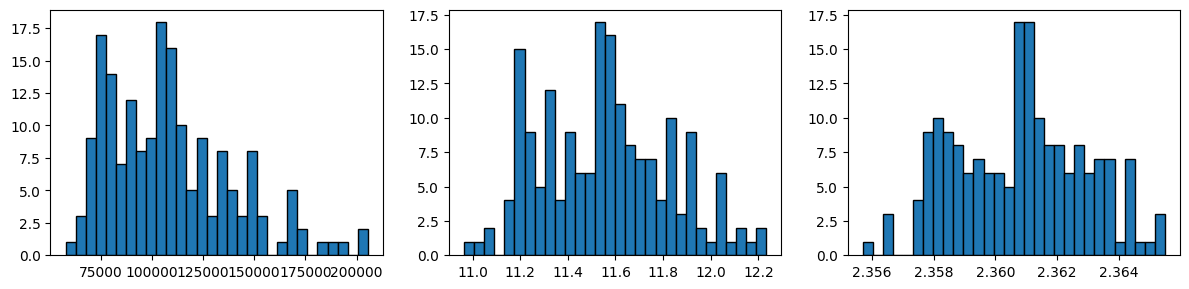

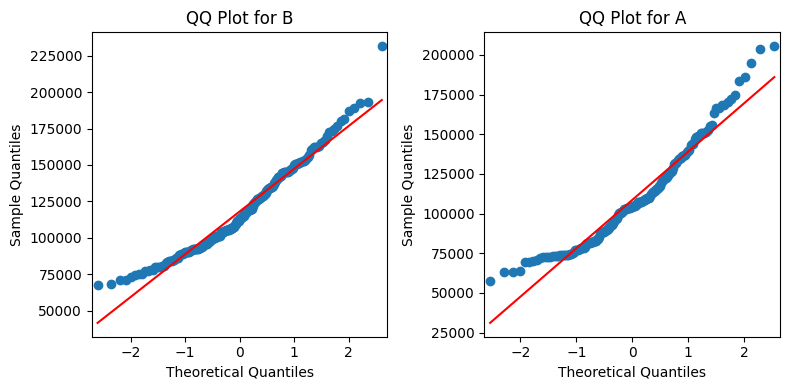

In [75]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the Salaries dataset from the URL
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
salaries = pd.read_csv(url)

# Filter the data based on the department type
theoretical_salaries = salaries[salaries['discipline'] == 'B']['salary']
applied_salaries = salaries[salaries['discipline'] == 'A']['salary']

# Display the first few rows of the dataset
print(salaries)

print(stats.ttest_ind(ap, th, equal_var=True))
boxcox_th_salaries, _ = stats.boxcox(theoretical_salaries)
th_salaries = np.array(boxcox_th_salaries)

print(stats.shapiro(th_salaries))
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(theoretical_salaries, bins=30, edgecolor='black')
axs[1].hist(np.log(theoretical_salaries), bins=30, edgecolor='black')
axs[2].hist(th_salaries, bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

boxcox_th_salaries, _ = stats.boxcox(applied_salaries)
th_salaries = np.array(boxcox_th_salaries)
print(stats.shapiro(np.log(applied_salaries)))
print(stats.shapiro(th_salaries))
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs[0].hist(applied_salaries, bins=30, edgecolor='black')
axs[1].hist(np.log(applied_salaries), bins=30, edgecolor='black')
axs[2].hist(th_salaries, bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


disciplines = salaries['discipline'].unique()
fig, axes = plt.subplots(1, len(disciplines), figsize=(8, 4))

for i, discipline in enumerate(disciplines):
    data = salaries[salaries['discipline'] == discipline]['salary']
    sm.qqplot(data, line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot for {discipline}')

plt.tight_layout()
plt.show()

## Normality

In [76]:
from scipy.stats import levene
from scipy.stats import shapiro
ap = np.log(applied_salaries)
th  = np.log(theoretical_salaries)
print(stats.shapiro(th))
print(stats.shapiro(ap))
print()
print(levene(ap, th))
print()
stats , p = stats.ttest_ind(ap, th, equal_var=True)
print(stats, p)

ShapiroResult(statistic=0.9879514552107148, pvalue=0.06559041632671048)
ShapiroResult(statistic=0.981501311833227, pvalue=0.01677562195045212)

LeveneResult(statistic=0.8267892464165671, pvalue=0.3637570669103217)

-3.513732636743348 0.0004930007802933415


# Task 2: Verify the Hypothesis

Objective: Verify if the proportion of higher rank professors (associate and full professors) is significantly different between male and female scientists.

In [77]:
import pandas as pd
import scipy.stats as stats
contingency_table = pd.crosstab(salaries['rank'], salaries['sex'])

# Display the contingency table
print(contingency_table)
print()
# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2: {p}")

sex        Female  Male
rank                   
AssocProf      10    54
AsstProf       11    56
Prof           18   248

Chi2: 0.014080466952222537


# Task 3: Verify the Hypothesis

Objective: Verify if the salaries of professors are significantly different based on rank, gender, and discipline, and check for interactions between these groups.

In [154]:
salaries['logsalary'] = np.log(salaries['salary'])
from scipy.stats import shapiro
def shapiro_test(group):
    stat, p_value = shapiro(group['logsalary'])
    return pd.Series({'W': stat, 'p_value': p_value})
shapiro_results = salaries.groupby(['sex', 'rank', 'discipline']).apply(shapiro_test).reset_index()
print(shapiro_results)

print()
from scipy.stats import levene
grouped_data = salaries.groupby(['sex', 'rank', 'discipline'])['logsalary'].apply(list)
stat, p_value = levene(*grouped_data)
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

# there is no homogenity of variance


       sex       rank discipline         W   p_value
0   Female  AssocProf          A  0.846687  0.215612
1   Female  AssocProf          B  0.610684  0.000616
2   Female   AsstProf          A  0.852213  0.164008
3   Female   AsstProf          B  0.895740  0.386789
4   Female       Prof          A  0.936324  0.575314
5   Female       Prof          B  0.975864  0.939265
6     Male  AssocProf          A  0.904325  0.036312
7     Male  AssocProf          B  0.979630  0.788771
8     Male   AsstProf          A  0.941090  0.302467
9     Male   AsstProf          B  0.931139  0.021790
10    Male       Prof          A  0.985966  0.235496
11    Male       Prof          B  0.991431  0.638933

Levene's test statistic: 7.0927354800992015
p-value: 5.408840884368279e-11


C:\Users\mgodl\AppData\Local\Temp\ipykernel_34300\3200062326.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = salaries.groupby(['sex', 'rank', 'discipline']).apply(shapiro_test).reset_index()


# Task 4: Verify the Hypothesis

Objective: Verify if credit amounts (in DM) are significantly different for people applying with different job, personal status, sex, or age.

In [102]:
import pandas as pd
import scipy.stats as stats
# Load the GermanCredit dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)

germancredit[['sex', 'personal_status']] = germancredit['personal_status_sex'].str.split(' : ', expand=True)
print(germancredit[['sex', 'personal_status']].head())

print(germancredit.value_counts())

      sex             personal_status
0    male                      single
1  female  divorced/separated/married
2    male                      single
3    male                      single
4    male                      single
status               duration  credit_history                            purpose              amount  savings                     employment_duration  installment_rate  personal_status_sex                  other_debtors  present_residence  property                                           age  other_installment_plans  housing   number_credits  job                                                         people_liable  telephone  foreign_worker  credit_risk  sex     personal_status           
... < 100 DM         6         all credits at this bank paid back duly   retraining           1198    ... < 100 DM                ... >= 7 years       4                 female : divorced/separated/married  none           4                  unknown/no property                

ShapiroResult(statistic=0.9942956109027035, pvalue=0.0007607681111769627)
ShapiroResult(statistic=0.9943167721461743, pvalue=0.0007852237104300393)
ShapiroResult(statistic=0.9930381286727066, pvalue=0.00012421278185246635)


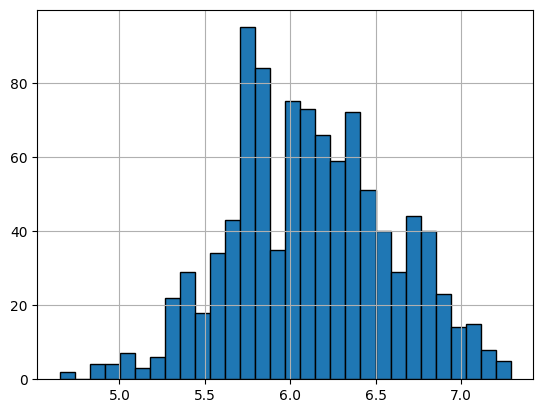

In [103]:

germancredit['box_amount'], _ = stats.boxcox(germancredit['amount'])
print(stats.shapiro(germancredit['box_amount']))
germancredit['box_amount'].hist(bins=30, edgecolor='black')

n = stats.boxcox_normmax(germancredit['amount'])
germancredit['box_amount'] = stats.boxcox(germancredit['amount'], lmbda=n)
print(stats.shapiro(germancredit['box_amount']))
#germancredit['box_amount'], _ = stats.boxcox(germancredit['amount'], lmbda=6)
germancredit['box_amount'].count()
print(shapiro(np.log(germancredit['amount'])))

In [155]:

# To little sample in some groups
from scipy.stats import shapiro
def shapiro_test(group):
    stat, p_value = shapiro(group['box_amount'])
    return pd.Series({'W': stat, 'p_value': p_value})
shapiro_results = germancredit.groupby(['sex', 'personal_status', 'job', 'age']).apply(shapiro_test).reset_index()
print(shapiro_results)

ValueError: Data must be at least length 3.

In [156]:
from scipy.stats import levene
grouped_data = germancredit.groupby(['sex', 'personal_status', 'job', 'age'])['box_amount'].apply(list)
stat, p_value = levene(*grouped_data)
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's test statistic: 1.1123251141376809
p-value: 0.13164549910024373


In [114]:
import statsmodels.formula.api as smf
# If we assume that everything is normal, i doubt 
# that the data is normal we can perform an ANOVA test
model = smf.ols('box_amount ~ sex ', data=germancredit).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)
print()
model = smf.ols('box_amount ~ sex * personal_status', data=germancredit).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)
print()

model = smf.ols('box_amount ~ sex * personal_status * job  * age', data=germancredit).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)
print()

              sum_sq     df          F   PR(>F)
sex         2.713038    1.0  14.028677  0.00019
Residual  193.005477  998.0        NaN      NaN

                           sum_sq     df             F        PR(>F)
sex                  6.851088e+00    1.0  3.698356e+01  1.695730e-09
personal_status     -5.694778e-14    3.0 -1.024719e-13  1.000000e+00
sex:personal_status  1.274945e+01    3.0  2.294138e+01  1.817037e-10
Residual             1.845058e+02  996.0           NaN           NaN

                                   sum_sq     df             F        PR(>F)
sex                          5.286944e-05    1.0  3.203687e-04  9.857232e-01
personal_status              2.830084e-06    3.0  5.716412e-06  9.999943e-01
job                          2.806080e-07    3.0  5.667927e-07  9.999994e-01
sex:personal_status          9.495840e+00    3.0  1.918040e+01  6.769468e-09
sex:job                     -5.192773e-09    3.0 -1.048875e-08  1.000000e+00
personal_status:job         -1.172739e-07    9.

c:\Users\mgodl\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\mgodl\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\mgodl\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
c:\Users\mgodl\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have f

# Task 5: Evaluate Interaction Between Group and Time

Description: 

The data provide the anxiety score, measured at three time points, of three groups of individuals practicing physical exercises at different levels (grp1: basal, grp2: moderate and grp3: high)

Objective: Evaluate if there is an interaction between group and time in explaining anxiety scores.

In [ ]:
import pandas as pd

# Load the anxiety dataset from GitHub
url = "https://raw.githubusercontent.com/kflisikowski/ds/master/anxiety.csv"
anxiety_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(anxiety_data.head())

   Unnamed: 0  id group    t1    t2    t3
0           1   1  grp1  14.1  14.4  14.1
1           2   2  grp1  14.5  14.6  14.3
2           3   3  grp1  15.7  15.2  14.9
3           4   4  grp1  16.0  15.5  15.3
4           5   5  grp1  16.5  15.8  15.7


In [ ]:
# your solution
import pingouin as pg
data = pd.melt(anxiety_data,id_vars=['id', 'group'], value_vars=['t1', 't2', 't3'] , var_name='time', value_name='score')
pg.rm_anova(dv='score', within='time', subject='id', data=data, detailed=True)
# it is changeing p = 2*10^-18

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,time,66.578815,2,33.289407,66.225833,2.827799e-18,1.657730e-11,0.141072,0.574434,False,0.259155,2.463413e-13
1,Error,44.234519,88,0.502665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 6: Evaluate the Goodness of Fit

Objective: Use the goodness of fit test to determine whether the distribution of credit amounts for male customers matches that of female customers.

In [125]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv"
germancredit = pd.read_csv(url)
n = stats.boxcox_normmax(germancredit['amount'])
germancredit['box_amount'] = stats.boxcox(germancredit['amount'], lmbda=n)
germancredit[['sex', 'personal_status']] = germancredit['personal_status_sex'].str.split(' : ', expand=True)
#print(germancredit.head())

In [127]:
#Kolmogorov-Smirnov test 
from scipy.stats import kstest
print(kstest(germancredit['box_amount'], 'norm'))

from scipy.stats import ks_2samp
male_data = germancredit[germancredit['sex'] == 'male']['box_amount']
female_data = germancredit[germancredit['sex'] == 'female']['box_amount']

# Perform the Kolmogorov-Smirnov test for two samples
ks_statistic, p_value = ks_2samp(male_data, female_data)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KstestResult(statistic=0.9999973992110524, pvalue=0.0, statistic_location=4.556488930873031, statistic_sign=-1)
KS Statistic: 0.1305750350631136
P-Value: 0.0012052294301572195


# Task 7: Evaluate the Change in Asthma Symptoms Over Time

Objective: determine if there is a significant change in asthma symptoms reported by participants at two different time points.

In [12]:
import pandas as pd
url = "https://github.com/bougioukas/basic_stats_R/raw/main/data/asthma.xlsx"
asthma_data = pd.read_excel(url)
print(asthma_data.head())

  know_begin know_end
0        yes      yes
1         no       no
2        yes       no
3         no       no
4         no       no


In [14]:
begin_counts = asthma_data['know_begin'].value_counts()
end_counts = asthma_data['know_end'].value_counts()

data = pd.DataFrame({
    'know_begin': begin_counts,
    'know_end': end_counts
})
print(data)
stats.chi2_contingency(data)


     know_begin  know_end
no           56        33
yes          30        53


Chi2ContingencyResult(statistic=11.269527548395832, pvalue=0.0007878977868740073, dof=1, expected_freq=array([[44.5, 44.5],
       [41.5, 41.5]]))

# Task 8: Differences of BG readings Over Time 

Objective: determine if there is a significant difference in the blood glucose (BG) readings over multiple time points.

Data: let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.

The test is done three times, say before, within and after a given clinical treatment and we want to know if there is a significant difference within the groups (times).

In [129]:
# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


df.columns=['before','during','after']
df.index.name='Subject'
df.head(10)

,before,during,after
Subject,,,
0,89.162573,94.023517,94.594145
1,90.857629,95.273755,95.040646
2,94.912999,96.612870,95.200472
3,95.254064,96.818673,97.205801
4,97.136291,97.760342,98.428840
5,99.809999,99.169227,98.867769
6,101.094087,99.579283,99.790581
7,101.531428,99.661758,100.669928
8,101.981148,100.812359,101.751155


In [143]:
# convert the dataframe to long format
df_long=df.stack().reset_index()
df_long.columns=['Subject','Period','Value']
df_long.head(10)
#Shapiro-Wilk test
from scipy.stats import shapiro
def shapiro_test(group):
    stat, p_value = shapiro(group['Value'])
    return pd.Series({'W': stat, 'p_value': p_value})
shapiro_results = df_long.groupby(['Period']).apply(shapiro_test).reset_index()
print(shapiro_results)
print()
from scipy.stats import levene
grouped_data = df_long.groupby(['Period'])['Value'].apply(list)
stat, p_value = levene(*grouped_data)
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")
print()

from pingouin import rm_anova
aov=rm_anova(dv='Value', within='Period', subject='Subject', data=df_long, detailed=True)
print(aov)

   Period         W   p_value
0   after  0.930971  0.017327
1  before  0.989290  0.964775
2  during  0.972539  0.431494

Levene's test statistic: 3.0428265073603664
p-value: 0.051491793394848974

   Source          SS  DF         MS          F         p-unc       ng2  \
0  Period  186.374238   2  93.187119  21.211424  4.405982e-08  0.021861   
1   Error  342.673616  78   4.393251        NaN           NaN       NaN   

        eps  
0  0.909247  
1       NaN  


C:\Users\mgodl\AppData\Local\Temp\ipykernel_34300\1524873236.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = df_long.groupby(['Period']).apply(shapiro_test).reset_index()


# Task 9: Evaluate the Change in Mice Weights Before and After Treatment

Objective: determine if there is a significant difference in the weights of mice before and after treatment.

In [151]:
import pandas as pd
# Weight of the mice before treatment
before = [200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7]

# Weight of the mice after treatment
after = [392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2]

subject_ids = list(range(1, len(before) + 1)) * 2

# Create a data frame
my_data = pd.DataFrame({
    'Subject_ID': subject_ids,
    'group': ['before'] * len(before) + ['after'] * len(after),
    'weight': before + after
})

# Display the first few rows of the dataset
print(my_data.head(5))

   Subject_ID   group  weight
0           1  before   200.1
1           2  before   190.9
2           3  before   192.7
3           4  before   213.0
4           5  before   241.4


In [153]:
# your solution
from scipy.stats import shapiro
def shapiro_test(group):
    stat, p_value = shapiro(group['weight'])
    return pd.Series({'W': stat, 'p_value': p_value})

shapiro_results = my_data.groupby(['group']).apply(shapiro_test).reset_index()
print(shapiro_results)
print()

from scipy.stats import levene
grouped_data = my_data.groupby(['group'])['weight'].apply(list)
stat, p_value = levene(*grouped_data)
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")
print()

from pingouin import rm_anova
aov=rm_anova(dv='weight', within='group', subject='Subject_ID', data=my_data, detailed=True)
print(aov)

    group         W   p_value
0   after  0.911207  0.289382
1  before  0.909379  0.276755

Levene's test statistic: 1.1285218119244715
p-value: 0.3021364645490378

  Source           SS  DF             MS           F         p-unc       ng2  \
0  group  189131.8005   1  189131.800500  436.105259  6.200298e-09  0.945747   
1  Error    3903.1545   9     433.683833         NaN           NaN       NaN   

   eps  
0  1.0  
1  NaN  


C:\Users\mgodl\AppData\Local\Temp\ipykernel_34300\3573582754.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = my_data.groupby(['group']).apply(shapiro_test).reset_index()


# Task 10: Calculate Effect Size and Power 

Objective: Use Python to calculate the effect size and power for a test comparing the total bill amounts between smokers and non-smokers. Interpret your results. If the power is not satisfactory - how many observations should we sample to achieve 90% power?

The tips dataset contains information about tips received by waitstaff in a restaurant, including various attributes such as total bill, tip amount, sex of the bill payer, whether the payer is a smoker, day of the week, time of day, and size of the party.

The tips dataset contains the following columns:

total_bill: The total bill amount (including tip) in dollars.

tip: The tip amount in dollars.

sex: The sex of the bill payer (Male or Female).

smoker: Whether the bill payer is a smoker (Yes or No).

day: The day of the week (Thur, Fri, Sat, Sun).

time: The time of day (Lunch or Dinner).

size: The size of the party.

In [2]:
import seaborn as sns
import pandas as pd

# Load the tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

smokers = tips[tips['smoker'] == 'Yes']['total_bill']
non_smokers = tips[tips['smoker'] == 'No']['total_bill']

t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False) 

def cohen_d(group1, group2):
    diff_mean = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + (len(group2) - 1) * np.var(group2, ddof=1)) / (len(group1) + len(group2) - 2))
    return diff_mean / pooled_std

effect_size = cohen_d(smokers, non_smokers)

power_analysis = TTestIndPower()

n1, n2 = len(smokers), len(non_smokers)
power = power_analysis.power(effect_size=effect_size, nobs1=n1, ratio=n2/n1, alpha=0.05)

required_n = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=0.05, ratio=n2/n1)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
print(f"Effect size (Cohen's d): {effect_size:.3f}")
print(f"Current power of the test: {power:.3f}")
print(f"Required sample size for 90% power: {required_n:.0f} observations")

T-statistic: 1.284, P-value: 0.201
Effect size (Cohen's d): 0.176
Current power of the test: 0.266
Required sample size for 90% power: 546 observations
